# Random Forest Classification Algorithm

- Random forest is a classification and regression algorithm.
- It is used to solve classification as well as regression problems.
- It is mainly used for classification problems.
- Forest is made up of lots of trees and more trees means more robust forest.
- Random forest algorithm creates decision trees on data samples.
- It gets the prediction from each of them and finally selects the best solution by means of voting.
- It is better than the single decision tree because it reduces overfitting  by averaging the result.


### Random Forest Algorithm - Assumptions
- This algorithm combines multiple trees in order to predict the class of the dataset.
- It is possible that some decision trees may produce the correct output while some may not.
- There should be some actual variables in the feature variable of the dataset so that it can predict accurate results rather than guessed result.
- The predictions from each tree must have very low correlations.


### Why to use Random Forest Algorithm
- The training time is less when compared to other algorithms.
- It predicts the output with high accuracy.
- It works well even for large datasets.
- Even when large portions of data is missing, it maintains good accuracy.


### Random Forest Algorithm - Working
Random forest algorithm can be understood from the following steps:
- Step 1: First, start with the selection of random samples from the given dataset.
- Step 2: Next, the algorithm will construct a decision tree for every sample.
- Step 3: In this step, voting will be performed for every predicted result.
- Step 4: At last, select the most voted prediction result as the final prediction result.


### Applications
- ***Banking:*** It is used in this sector in order to identify the loan risk
- ***Medicine:*** With the help of this algorithm, disease trends can be analyzed
- ***Land Use:*** Areas of similar land use can be identified by this algorithm
- ***Marketing:*** Marketing trends can be analyzed by this algorithm



# Credit Card Fraud Detection using Random Forest Algorithm

### Objective
The prediction model will describe you whether to invest in the proposal or not. Here, we choose to minimize the risk for investing i.e, we aim to minimize investing in proposals for which the loan will not be paid back.

### Abstract
- In this project, main focus is on credit card fraud detection for in real world. Initially we collect the credit card datasets for trained dataset. Then will provide the user credit card queries for testing data set.
- After classification process of random forest algorithm using to the already analysing data set and user provide current dataset. Finally optimizing.
- The results indicate about the optimal accuracy for Random Forest are 98.6% respectively the accuracy of the result data.

## Implementation

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(2)

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,...,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000
mean,2226.730305,-0.236087,0.264945,0.827038,0.038482,-0.003246,0.182904,0.037771,-0.031792,0.274900,...,-0.027279,-0.152368,-0.040748,0.037787,0.095040,-0.047173,0.034323,0.004230,64.005517,0.000575
std,1389.413821,1.369423,1.159738,1.008941,1.426231,1.189735,1.364610,1.044013,1.184148,0.996248,...,0.785643,0.631797,0.365184,0.619756,0.402804,0.491214,0.340083,0.244556,196.030129,0.023975
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.512377,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,1022.000000,-0.994431,-0.313324,0.282338,-0.892458,-0.607498,-0.691254,-0.477109,-0.192508,-0.331949,...,-0.246075,-0.589888,-0.189173,-0.340413,-0.139914,-0.410996,-0.044127,-0.016606,3.870000,0.000000
50%,2136.000000,-0.410106,0.330421,0.857535,0.082108,-0.088854,-0.163031,0.060510,0.038049,0.274670,...,-0.097674,-0.174903,-0.047611,0.103070,0.113882,-0.089671,0.019557,0.019527,15.250000,0.000000
75%,3494.000000,1.124355,0.914229,1.473973,1.013701,0.433500,0.581636,0.580912,0.339703,0.807445,...,0.070683,0.279351,0.085627,0.444598,0.356538,0.248303,0.168213,0.081684,57.480000,0.000000
max,4999.000000,1.685314,6.224859,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,15.631453,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.157934,7712.430000,1.000000


In [6]:
print('Valid transaction',len(data[data['Class']==0]))
print('fraud transaction',len(data[data['Class']==1]))

Valid transaction 5214
fraud transaction 3


In [7]:
y = data['Class']
x = data.drop(columns=['Class'],axis=1)

In [8]:
# splitting the data into train test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [9]:
# fitting randomforest model
classifier = RandomForestClassifier()

In [10]:
# model_1
classifier = RandomForestClassifier(n_estimators=20,criterion='entropy', random_state=0,max_depth=10)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20,
                       random_state=0)

In [11]:
y_pred = classifier.predict(x_test)

In [12]:
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1564
           1       0.00      0.00      0.00         2

    accuracy                           1.00      1566
   macro avg       0.50      0.50      0.50      1566
weighted avg       1.00      1.00      1.00      1566

Confusion matrix:
 [[1564    0]
 [   2    0]]


C:\Users\Aditi Patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aditi Patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aditi Patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# model_2
classifier = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=30,
                       random_state=0)

In [14]:
y_pred_2 = classifier.predict(x_test)

In [15]:
print('Classifcation report:\n', classification_report(y_test, y_pred_2))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_2)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1564
           1       0.00      0.00      0.00         2

    accuracy                           1.00      1566
   macro avg       0.50      0.50      0.50      1566
weighted avg       1.00      1.00      1.00      1566

Confusion matrix:
 [[1564    0]
 [   2    0]]


C:\Users\Aditi Patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aditi Patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aditi Patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# trying with undersmapling technique
# This is the pipeline module we need from imblearn for Undersampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# Define which resampling method and which ML model to use in the pipeline
resampling = RandomUnderSampler()
model = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)


# Define the pipeline and combine sampling method with the RF model
pipeline = Pipeline([('RandomUnderSampler', resampling), ('RF', model)])
pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)


# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.07      0.14      1564
           1       0.00      1.00      0.00         2

    accuracy                           0.08      1566
   macro avg       0.50      0.54      0.07      1566
weighted avg       1.00      0.08      0.14      1566

Confusion matrix:
 [[ 116 1448]
 [   0    2]]


In [17]:
# This is the pipeline module we need from imblearn for Oversampling
from imblearn.over_sampling import RandomOverSampler
# Define which resampling method and which ML model to use in the pipeline
resampling = RandomOverSampler()
model = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)

# Define the pipeline and combine sampling method with the model
pipeline = Pipeline([('RandomOverSampler', resampling), ('RF', model)])
pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)


# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1564
           1       0.00      0.00      0.00         2

    accuracy                           1.00      1566
   macro avg       0.50      0.50      0.50      1566
weighted avg       1.00      1.00      1.00      1566

Confusion matrix:
 [[1564    0]
 [   2    0]]


C:\Users\Aditi Patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aditi Patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aditi Patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# This is the pipeline module we need from imblearn for SMOTE
from imblearn.over_sampling import SMOTE
# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(sampling_strategy='auto',random_state=0)
model = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)

# Define the pipeline and combine sampling method with the model
pipeline = Pipeline([('SMOTE', resampling), ('RF', model)])
pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)


# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

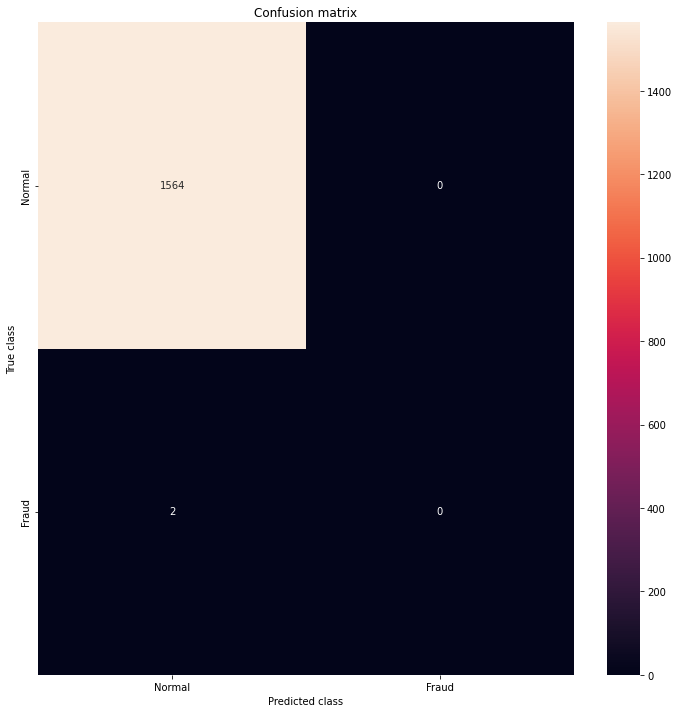

In [19]:
# visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 